Regression with an Insurance Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
print("The shape of train data: ", train_df.shape)
print("The shape of test data: ", test_df.shape)

The shape of train data:  (1200000, 21)
The shape of test data:  (800000, 20)


In [5]:
train_df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [7]:
null_counts = train_df.isnull().sum()

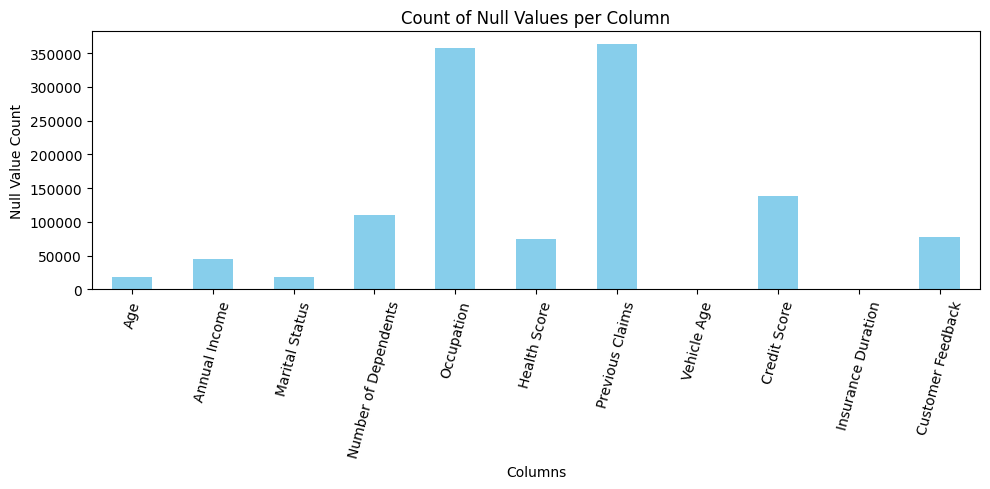

In [8]:
null_counts = null_counts[null_counts > 0]

# Plot the bar chart
plt.figure(figsize=(10, 5))
null_counts.plot(kind='bar', color='skyblue')
plt.title("Count of Null Values per Column")
plt.xlabel("Columns")
plt.ylabel("Null Value Count")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [9]:
test_df.isna().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_train_num = train_df.select_dtypes(include = numerics)
df_train_num.columns

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

In [11]:
df_test_num = test_df.select_dtypes(include = numerics)
df_test_num.columns


Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object')

In [12]:
df_train_cate = train_df.drop(df_train_num.columns,axis = 1)
df_train_cate.columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [13]:
df_test_cate = test_df.drop(df_test_num.columns,axis = 1)
df_test_cate.columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [14]:
# RandomForestRegressor ni chaqiramiz — bu yo‘qolgan qiymatlarni bashorat qilish uchun ishlatiladigan model
from sklearn.ensemble import RandomForestRegressor

# IterativeImputer ni faollashtirish uchun eksperimental modulni yuklaymiz
from sklearn.experimental import enable_iterative_imputer

# IterativeImputer ni import qilamiz — u NaN qiymatlarni to‘ldirish uchun ishlatiladi
from sklearn.impute import IterativeImputer

# fillna nomli funksiya e'lon qilinmoqda
# data — bu DataFrame (jadval), col — to‘ldirilishi kerak bo‘lgan ustun nomi
def fillna(data, col):

    # Belgilangan ustunni alohida DataFrame ko‘rinishida ajratamiz
    df_train_num1 = pd.DataFrame(data[col])

    # IterativeImputer obyektini yaratamiz, ichida RandomForestRegressor ishlatiladi
    # random_state=0 — natijalarni takrorlanuvchan qilish uchun
    impute = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

    # Imputer modelni ustundagi mavjud (NaN bo‘lmagan) qiymatlar asosida o‘rgatadi
    impute.fit(df_train_num1)

    # Quyidagi qatorda to‘ldirilgan ustunni ko‘rsatish mumkin edi (hozircha izohga olingan)
    # display(pd.DataFrame(impute.transform(df_train_num1)))

    # transform orqali yo‘qolgan qiymatlar to‘ldiriladi va eski ustun o‘rniga yoziladi
    data[col] = pd.DataFrame(impute.transform(df_train_num1))

    # Natijada to‘ldirilgan ustun qaytariladi
    return data[col]


In [15]:
for i in df_train_num:
    if i == 'id':
        continue
    train_df[i] = fillna(df_train_num,i)

In [16]:
df_train_num

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,0,19.0,10049.000000,1.000000,22.598761,2.000000,17.0,372.00000,5.0,2869.0
1,1,39.0,31678.000000,3.000000,15.569731,1.000000,12.0,694.00000,2.0,1483.0
2,2,23.0,25602.000000,3.000000,47.177549,1.000000,14.0,592.92435,3.0,567.0
3,3,21.0,141855.000000,2.000000,10.938144,1.000000,0.0,367.00000,1.0,765.0
4,4,21.0,39651.000000,1.000000,20.376094,0.000000,8.0,598.00000,4.0,2022.0
...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,27316.000000,0.000000,13.772907,1.002689,5.0,372.00000,3.0,1303.0
1199996,1199996,54.0,35786.000000,2.009934,11.483482,1.002689,10.0,597.00000,4.0,821.0
1199997,1199997,19.0,51884.000000,0.000000,14.724469,0.000000,19.0,592.92435,6.0,371.0
1199998,1199998,55.0,32745.217777,1.000000,18.547381,1.000000,7.0,407.00000,4.0,596.0


In [17]:
train_df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.000000,Married,1.000000,Bachelor's,Self-Employed,22.598761,Urban,...,2.000000,17.0,372.00000,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.000000,Divorced,3.000000,Master's,NaN,15.569731,Rural,...,1.000000,12.0,694.00000,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.000000,Divorced,3.000000,High School,Self-Employed,47.177549,Suburban,...,1.000000,14.0,592.92435,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.000000,Married,2.000000,Bachelor's,NaN,10.938144,Rural,...,1.000000,0.0,367.00000,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.000000,Single,1.000000,Bachelor's,Self-Employed,20.376094,Rural,...,0.000000,8.0,598.00000,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.000000,Married,0.000000,Master's,Unemployed,13.772907,Urban,...,1.002689,5.0,372.00000,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.000000,Divorced,2.009934,Master's,Self-Employed,11.483482,Rural,...,1.002689,10.0,597.00000,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.000000,Divorced,0.000000,Master's,NaN,14.724469,Suburban,...,0.000000,19.0,592.92435,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,32745.217777,Single,1.000000,PhD,NaN,18.547381,Suburban,...,1.000000,7.0,407.00000,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [18]:
for i in df_test_num:
    if i == 'id':
        continue
    test_df[i] = fillna(df_test_num,i)

In [19]:
test_df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.00000,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,1.004873,19.0,592.904749,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.00000,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,1.004873,14.0,372.000000,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.00000,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,1.004873,16.0,819.000000,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.00000,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.000000,3.0,770.000000,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.00000,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,1.004873,14.0,755.000000,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.00000,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,1.004873,8.0,309.000000,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,41.13644,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.000000,0.0,592.904749,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.00000,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,1.004873,10.0,592.904749,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.00000,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.000000,17.0,467.000000,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


In [20]:
print(test_df['Customer Feedback'].mode())
print(test_df['Marital Status'].mode())
print(test_df['Occupation'].mode())

0    Average
Name: Customer Feedback, dtype: object
0    Single
Name: Marital Status, dtype: object
0    Employed
Name: Occupation, dtype: object


In [21]:
test_df['Customer Feedback'] = test_df['Customer Feedback'].fillna('Average')
test_df['Marital Status'] = test_df['Marital Status'].fillna('Single')
test_df['Occupation'] = test_df['Occupation'].fillna('Employed')

In [22]:
print(train_df['Customer Feedback'].mode())
print(train_df['Marital Status'].mode())
print(train_df['Occupation'].mode())

0    Average
Name: Customer Feedback, dtype: object
0    Single
Name: Marital Status, dtype: object
0    Employed
Name: Occupation, dtype: object


In [23]:
train_df['Customer Feedback'] = train_df['Customer Feedback'].fillna('Average')
train_df['Marital Status'] = train_df['Marital Status'].fillna('Single')
train_df['Occupation'] = train_df['Occupation'].fillna('Employed')

In [24]:
train_df.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [25]:
test_df.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
dtype: int64

In [26]:
df_test_cate.isna().sum()

Gender                     0
Marital Status         12336
Education Level            0
Occupation            239125
Location                   0
Policy Type                0
Policy Start Date          0
Customer Feedback      52276
Smoking Status             0
Exercise Frequency         0
Property Type              0
dtype: int64

In [27]:
df_train_num = train_df.select_dtypes(include = numerics)
# df_train_num.columns
df_test_num = test_df.select_dtypes(include = numerics)
# df_test_num.columns
df_train_cate = train_df.drop(df_train_num.columns,axis = 1)
# df_train_cate.columns
df_test_cate = test_df.drop(df_test_num.columns,axis = 1)
# df_test_cate.columns

In [28]:
for i in df_train_cate:
    enc_nom_1 = (df_train_cate.groupby(i).size()) / len(df_train_cate)
    # print(enc_nom_1)
    train_df[i] = df_train_cate[i].apply(lambda x : enc_nom_1[x])
train_df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,0.497858,10049.000000,0.328597,1.000000,0.252695,0.235538,22.598761,0.331259,...,2.000000,17.0,372.00000,5.0,0.000045,0.312932,0.498439,0.255149,0.333624,2869.0
1,1,39.0,0.497858,31678.000000,0.326470,3.000000,0.253182,0.534021,15.569731,0.334122,...,1.000000,12.0,694.00000,2.0,0.000003,0.379774,0.501561,0.249858,0.333624,1483.0
2,2,23.0,0.502143,25602.000000,0.326470,3.000000,0.241201,0.235538,47.177549,0.334618,...,1.000000,14.0,592.92435,3.0,0.000008,0.307294,0.501561,0.255149,0.333624,567.0
3,3,21.0,0.502143,141855.000000,0.328597,2.000000,0.252695,0.534021,10.938144,0.334122,...,1.000000,0.0,367.00000,1.0,0.000006,0.312932,0.501561,0.245476,0.333315,765.0
4,4,21.0,0.502143,39651.000000,0.344933,1.000000,0.252695,0.235538,20.376094,0.334122,...,0.000000,8.0,598.00000,4.0,0.000005,0.312932,0.501561,0.255149,0.333624,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,0.497858,27316.000000,0.328597,0.000000,0.253182,0.230442,13.772907,0.331259,...,1.002689,5.0,372.00000,3.0,0.000003,0.312932,0.498439,0.245476,0.333315,1303.0
1199996,1199996,54.0,0.502143,35786.000000,0.326470,2.009934,0.253182,0.235538,11.483482,0.334122,...,1.002689,10.0,597.00000,4.0,0.000056,0.312932,0.498439,0.255149,0.333315,821.0
1199997,1199997,19.0,0.502143,51884.000000,0.326470,0.000000,0.253182,0.534021,14.724469,0.334618,...,0.000000,19.0,592.92435,6.0,0.000005,0.307294,0.498439,0.249858,0.333061,371.0
1199998,1199998,55.0,0.502143,32745.217777,0.344933,1.000000,0.252922,0.534021,18.547381,0.334618,...,1.000000,7.0,407.00000,4.0,0.000008,0.312932,0.498439,0.245476,0.333315,596.0


In [29]:
for i in df_test_cate:
    enc_nom_1 = (df_test_cate.groupby(i).size()) / len(df_test_cate)
    # print(enc_nom_1)
    test_df[i] = df_test_cate[i].apply(lambda x : enc_nom_1[x])
test_df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.00000,0.498639,2310.0,0.345051,4.0,0.252779,0.234989,7.657981,0.333900,0.332686,1.004873,19.0,592.904749,1.0,0.000008,0.313043,0.502324,0.255642,0.333939
1,1200001,31.00000,0.498639,126031.0,0.327715,2.0,0.253190,0.234989,13.381379,0.333987,0.334536,1.004873,14.0,372.000000,8.0,0.000003,0.307591,0.502324,0.250642,0.332555
2,1200002,47.00000,0.498639,17092.0,0.327234,0.0,0.253085,0.230387,24.354527,0.332112,0.332778,1.004873,16.0,819.000000,9.0,0.000050,0.379366,0.502324,0.248000,0.333506
3,1200003,28.00000,0.498639,30424.0,0.327234,3.0,0.253085,0.234989,5.136225,0.333987,0.332778,1.000000,3.0,770.000000,5.0,0.000032,0.313043,0.502324,0.245715,0.333939
4,1200004,24.00000,0.501361,10863.0,0.327234,2.0,0.240946,0.230387,11.844155,0.333987,0.334536,1.004873,14.0,755.000000,7.0,0.000011,0.379366,0.497676,0.255642,0.333939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.00000,0.498639,38782.0,0.327715,1.0,0.252779,0.534624,14.498639,0.333900,0.334536,1.004873,8.0,309.000000,2.0,0.000005,0.379366,0.502324,0.245715,0.333506
799996,1999996,41.13644,0.498639,73462.0,0.345051,0.0,0.253190,0.534624,8.145748,0.333900,0.332686,2.000000,0.0,592.904749,2.0,0.000006,0.307591,0.497676,0.245715,0.332555
799997,1999997,26.00000,0.498639,35178.0,0.345051,0.0,0.253190,0.534624,6.636583,0.332112,0.332778,1.004873,10.0,592.904749,6.0,0.000011,0.313043,0.497676,0.248000,0.332555
799998,1999998,34.00000,0.498639,45661.0,0.345051,3.0,0.253190,0.534624,15.937248,0.332112,0.334536,2.000000,17.0,467.000000,7.0,0.000010,0.379366,0.497676,0.255642,0.333506


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


In [31]:
trainX = train_df.drop('Premium Amount',axis = 1)
trainY = train_df['Premium Amount']
testX = test_df

In [32]:
from sklearn import svm, ensemble, metrics
forest = ensemble.RandomForestRegressor(n_estimators = 20) 

forest.fit(trainX, trainY)
predictions = forest.predict(testX)

predictions = pd.DataFrame(predictions)
predictions

,0
0,1146.15
1,1583.25
2,2171.70
3,1917.75
4,1145.40
...,...
799995,1489.55
799996,1640.50
799997,1559.55
799998,1085.90


In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

trainX = train_df.drop('Premium Amount', axis=1)
trainY = train_df['Premium Amount']
testX = test_df

models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=20)
}

results = {}

for name, model in models.items():
    model.fit(trainX, trainY)
    predictions = model.predict(trainX)

    mae = mean_absolute_error(trainY, predictions)
    rmse = np.sqrt(mean_squared_error(trainY, predictions))  
    regression_accuracy = 1 - (mae / np.mean(trainY))

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'Regression Accuracy': regression_accuracy,
        'Model': model
    }

# Print results
for name, result in results.items():
    print(f"--- {name} ---")
    print(f"MAE: {result['MAE']:.2f}")
    print(f"RMSE: {result['RMSE']:.2f}")
    print(f"Regression Accuracy: {result['Regression Accuracy']:.4f}\n")

# Save the best model
best_model_name = max(results, key=lambda x: results[x]['Regression Accuracy'])
best_model = results[best_model_name]['Model']
joblib.dump(best_model, f'{best_model_name}_best_model.pkl')
print(f"✅ Best model '{best_model_name}' saved as {best_model_name}_best_model.pkl")


--- LinearRegression ---
MAE: 667.51
RMSE: 863.75
Regression Accuracy: 0.3946

--- DecisionTree ---
MAE: 0.00
RMSE: 0.00
Regression Accuracy: 1.0000

--- RandomForest ---
MAE: 256.69
RMSE: 348.73
Regression Accuracy: 0.7672

✅ Best model 'DecisionTree' saved as DecisionTree_best_model.pkl


In [35]:
# Load best model
best_model = joblib.load('DecisionTree_best_model.pkl')

# Predict on testX
test_predictions = best_model.predict(testX)

# Save predictions to CSV
pred_df = pd.DataFrame(test_predictions, columns=['Predicted Premium Amount'])
pred_df.to_csv('test_predictions.csv', index=False)

print("✅ Test predictions saved to test_predictions.csv")


✅ Test predictions saved to test_predictions.csv
